200520X

Q1

51
100
105
256


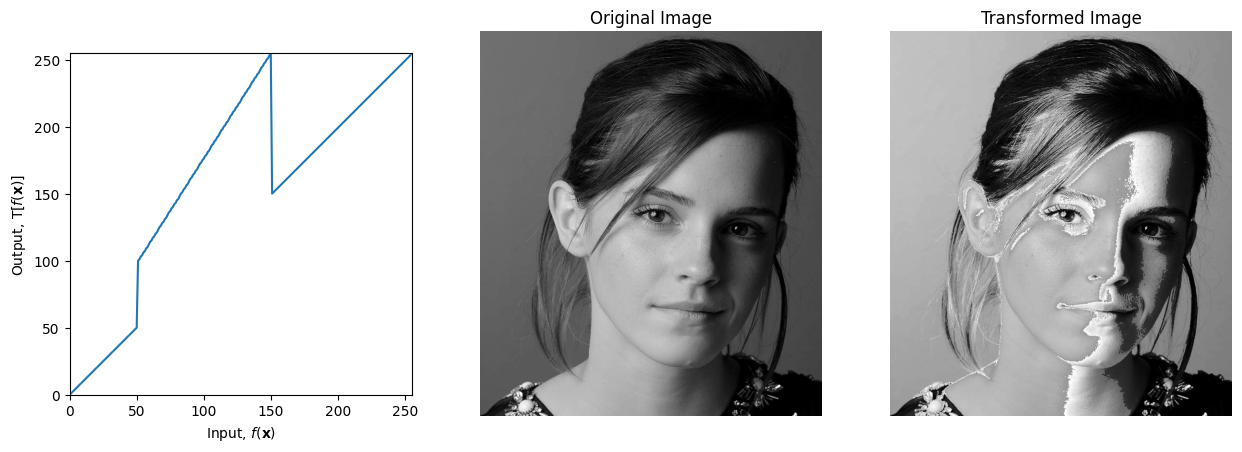

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 255)])

t1 = np.linspace(0, c[0, 1], c[0, 1] + 1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0, 0], c[1, 1], c[1,0] - c[0, 1]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1, 0] , c[1, 1], c[1, 1] - c[1, 0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2,t3), axis=0).astype('uint8')
print(len(transform))

# plot transform
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].plot(transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
plt.savefig('transform.png')


# plot original image
img_orig = cv.imread("emma.jpg", cv.IMREAD_GRAYSCALE)
ax[1].imshow(img_orig, cmap='gray')
ax[1].title.set_text('Original Image')
ax[1].axis('off')

# plot transformed image
image_transformed = cv.LUT(img_orig, transform)
ax[2].imshow(image_transformed, cmap='gray')
ax[2].title.set_text('Transformed Image')
ax[2].axis('off')

plt.show()

Q2. (a)white matter

181
75
256


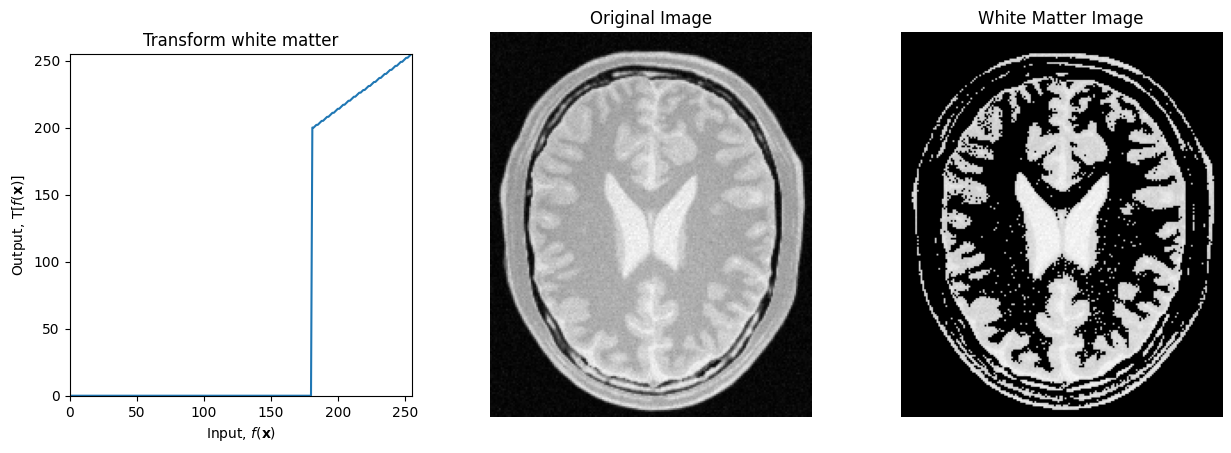

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 255)])

t1 = np.linspace(0, 0, 181).astype('uint8')
print(len(t1))

t2 = np.linspace(200, 255, 255-180).astype('uint8')
print(len(t2))


transform_whitematter = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform_whitematter))


# plot transform
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(transform_whitematter)
plt.title('Transform white matter')
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().set_aspect('equal')

# plot original image
img_orig = cv.imread("BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
plt.subplot(1, 3, 2)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# plot transformed white matter image
image_whitematter = cv.LUT(img_orig, transform_whitematter)
plt.subplot(1, 3, 3)
plt.imshow(image_whitematter, cmap='gray')
plt.title('White Matter Image')
plt.axis('off')

plt.show()

Q2.(b) Gray matter

91
90
75
256


(-0.5, 180.5, 216.5, -0.5)

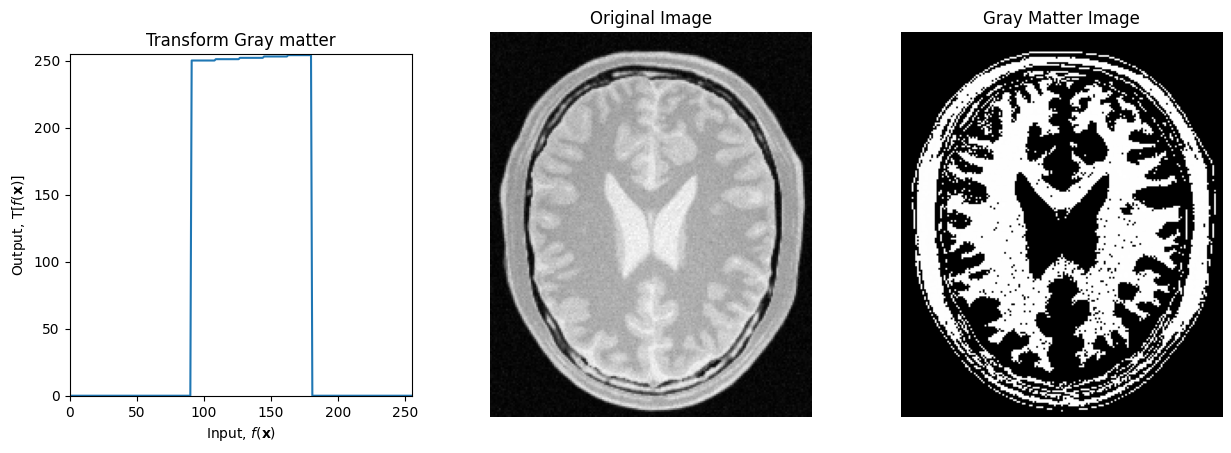

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,0, 91).astype('uint8')
print(len(t1))

t2 = np.linspace(250, 255, 180-90).astype('uint8')
print(len(t2))

t3 = np.linspace(0, 0, 255-180).astype('uint8')
print(len(t3))

transform_graymatter = np.concatenate((t1, t2,t3), axis=0).astype('uint8')
print(len(transform_graymatter))

# plot transform
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(transform_graymatter)
plt.title('Transform Gray matter')
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().set_aspect('equal')

# plot original image
img_orig = cv.imread("BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
plt.subplot(1, 3, 2)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# plot transformed white matter image
image_graymatter = cv.LUT(img_orig, transform_graymatter)
plt.subplot(1, 3, 3)
plt.imshow(image_graymatter, cmap='gray')
plt.title('Gray Matter Image')
plt.axis('off')

Q3

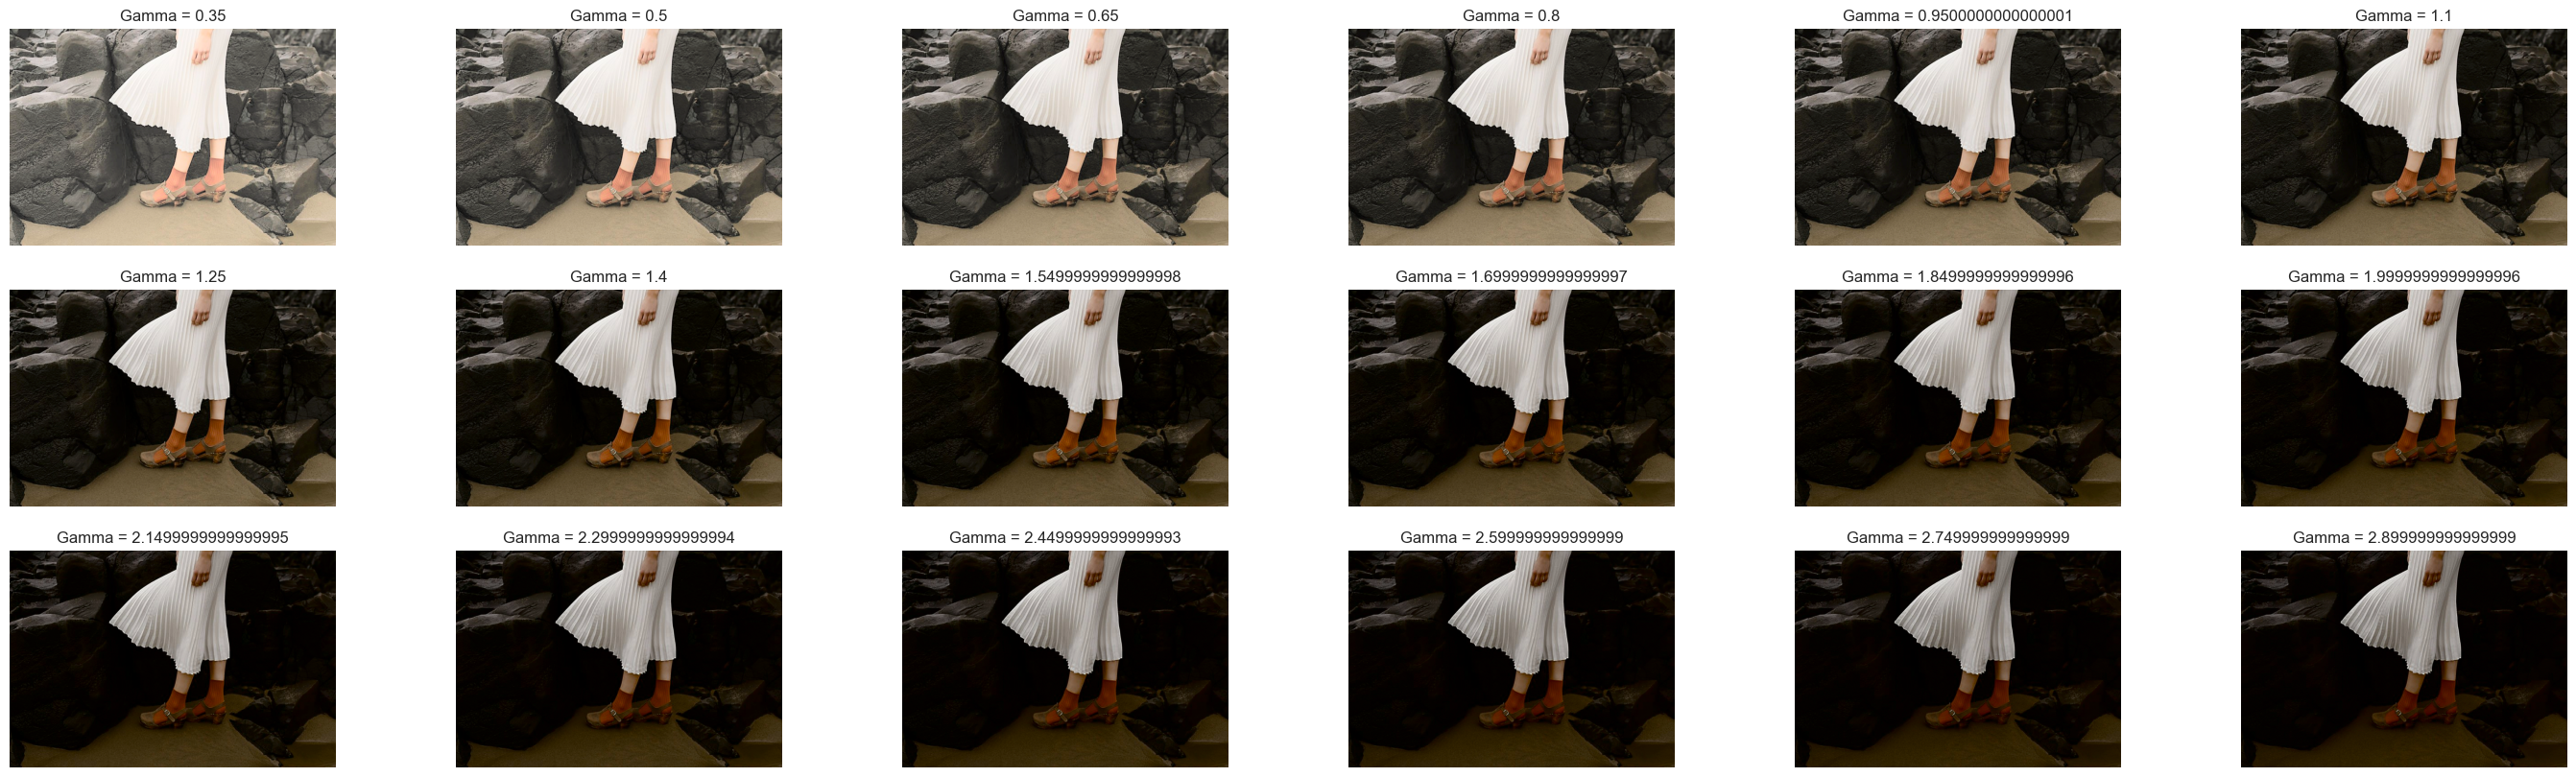

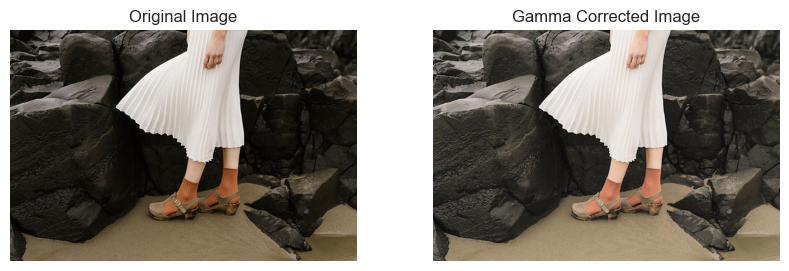

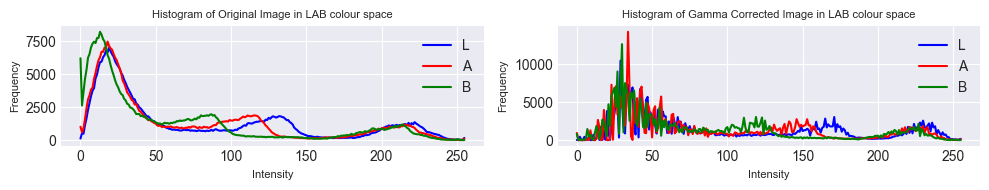

In [88]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

img_gamma = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
L_channel, A_channel, B_channel = cv.split(img_gamma)

fig, ax = plt.subplots(3, 6, figsize=(35, 10))
gamma = 0.35
for i in range(18):
    g_table = np.array([((j / 255.0) ** gamma) * 255.0 for j in np.arange(0, 256)]).astype("uint8")
    corrected_L_channel = cv.LUT(L_channel, g_table)
    # img_gamma[:,:,0] = corrected_L_channel.astype(np.uint8)
    img_corrected = cv.merge((corrected_L_channel, A_channel, B_channel))
    img_corrected = cv.cvtColor(img_corrected, cv.COLOR_LAB2BGR)
    plt.subplot(3, 6, i+1)
    plt.imshow(img_corrected)
    plt.title("Gamma = " + str(gamma))
    plt.axis("off")
    gamma += 0.15
plt.show()


gamma = 0.65
g_table = np.array([(i / 255.0) **(gamma) * 255.0 for i in np.arange(0, 256)]).astype("uint8")
corrected_L_channel = cv.LUT(L_channel, g_table)
img_gamma = cv.merge((corrected_L_channel, A_channel, B_channel))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2BGR)


fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_orig)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gamma)
plt.title('Gamma Corrected Image')
plt.axis('off')


fig, ax = plt.subplots(1, 2, figsize=(10, 2))
color = ('b', 'r', 'g')
for i, col in enumerate(color):
    histr_original = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    plt.subplot(1, 2, 1)
    plt.plot(histr_original, color=col)
    plt.title('Histogram of Original Image in LAB colour space', fontsize=8)
    plt.xlabel('Intensity', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.legend(('L', 'A', 'B'))

    histr_corrected = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    plt.subplot(1, 2, 2)
    plt.plot(histr_corrected, color=col)
    plt.title('Histogram of Gamma Corrected Image in LAB colour space', fontsize=8)
    plt.xlabel('Intensity', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.legend(('L', 'A', 'B'))

plt.tight_layout()
plt.show()



Q4

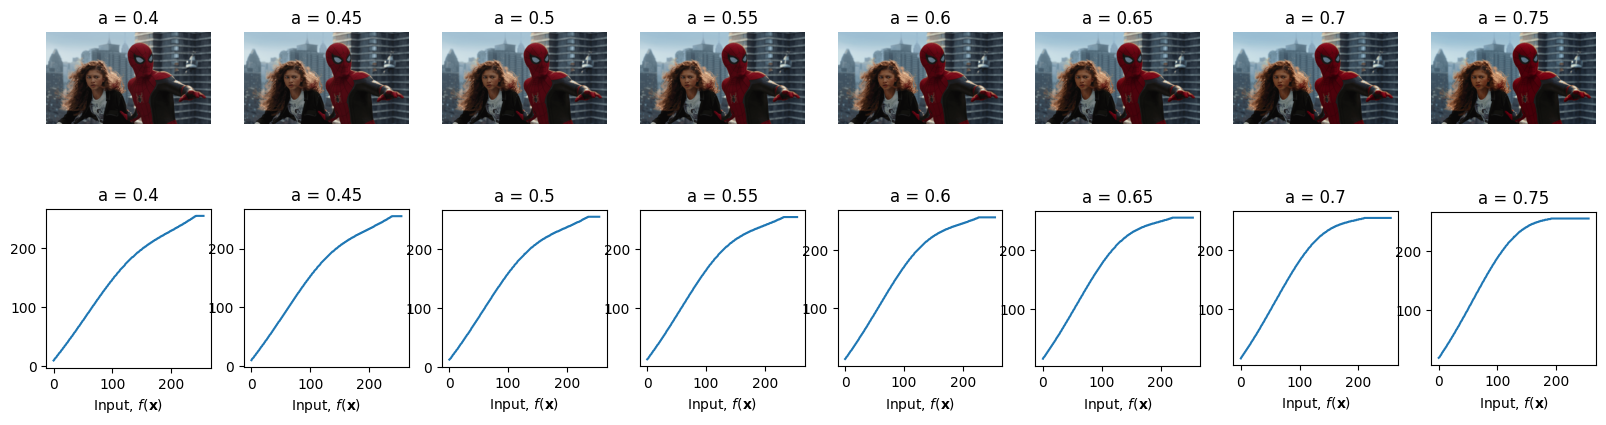

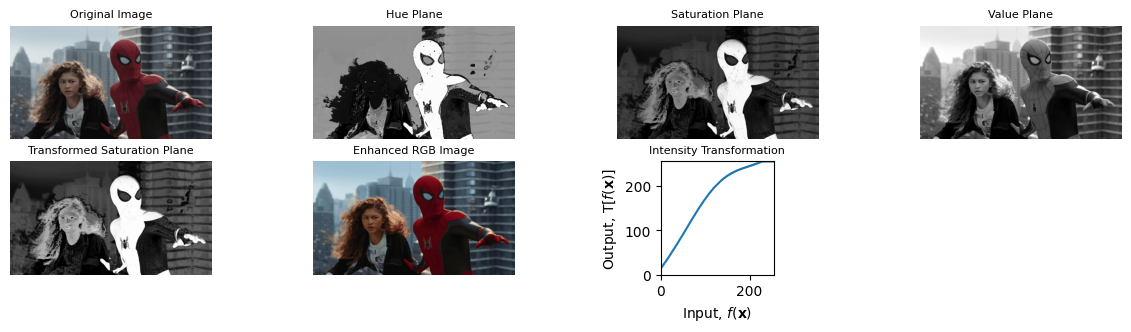

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "spider.png"
image = cv.imread(image_path)

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Q(4)(a) Extract hue, saturation, and value planes
hue_plane, saturation_plane, value_plane = cv.split(hsv_image)

# Define the intensity transformation function
def intensity_transformation(x, a, sigma):
    return min(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255)

# Q(4)(c) Adjust 'a' value for a visually pleasing output
a = 0.4

plt.figure(figsize=(20, 5))

for i in range(8):
    transformation=np.array([intensity_transformation(x,a+0.05*i,70) for x in range(256)]).astype(np.uint8)
    transformed_saturation_plane = cv.LUT(saturation_plane,transformation)
    enhanced_hsv_image = cv.merge((hue_plane, transformed_saturation_plane, value_plane))
    enhanced_rgb_image = cv.cvtColor(enhanced_hsv_image, cv.COLOR_HSV2RGB)
    plt.subplot(2, 8, i+1)
    plt.imshow(enhanced_rgb_image)
    plt.title('a = '+str(round(a+0.05*i, 2)))
    plt.axis('off')
    plt.subplot(2, 8, i+9)
    plt.plot(transformation)
    # roundoff the value to 2 decimal places
    # a_rounded = round(a+0.05*i, 2)
    plt.title('a = '+str(round(a+0.05*i, 2)))
    plt.xlabel(r'Input, $f(\mathbf{x})$')
    # plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
    plt.gca().set_aspect('equal')
plt.show()


# selected a value
a = 0.6
# Q(4)(b) Apply the intensity transformation to the saturation plane
transformation=np.array([intensity_transformation(x,a,70) for x in range(256)]).astype(np.uint8)
transformed_saturation_plane = cv.LUT(saturation_plane,transformation)

# Ensure all planes have the same shape and data type
transformed_saturation_plane = transformed_saturation_plane.astype(np.uint8)

hist = cv.calcHist([transformed_saturation_plane],[0],None,[256],[0,256])


# Q(4)(d) Combine the planes back into an HSV image
enhanced_hsv_image = cv.merge((hue_plane, transformed_saturation_plane, value_plane))

# Convert the enhanced HSV image back to RGB
enhanced_rgb_image = cv.cvtColor(enhanced_hsv_image, cv.COLOR_HSV2RGB)

# Plot original image
plt.figure(figsize=(15, 5))
plt.subplot(3, 4, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image',fontsize=8)
plt.axis('off')

#  Plot hue plane
plt.subplot(3, 4, 2)
plt.imshow(hue_plane, cmap='gray')
plt.title('Hue Plane',fontsize=8)
plt.axis('off')

# Plot saturation plane
plt.subplot(3, 4, 3)
plt.imshow(saturation_plane, cmap='gray')
plt.title('Saturation Plane',fontsize=8)
plt.axis('off')

# Plot value plane
plt.subplot(3, 4, 4)
plt.imshow(value_plane, cmap='gray')
plt.title('Value Plane',fontsize=8)
plt.axis('off')

#  Plot transformed saturation plane
plt.subplot(3, 4, 5)
plt.imshow(transformed_saturation_plane, cmap='gray')
plt.title('Transformed Saturation Plane',fontsize=8)
plt.axis('off')

# Plot enhanced RGB image
plt.subplot(3, 4, 6)
plt.imshow(enhanced_rgb_image)
plt.title('Enhanced RGB Image',fontsize=8)
plt.axis('off')

#  Plot intensity transformation
plt.subplot(3, 4, 7)
plt.plot(transformation)
plt.title('Intensity Transformation',fontsize=8)
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().set_aspect('equal')

plt.show()



Q6

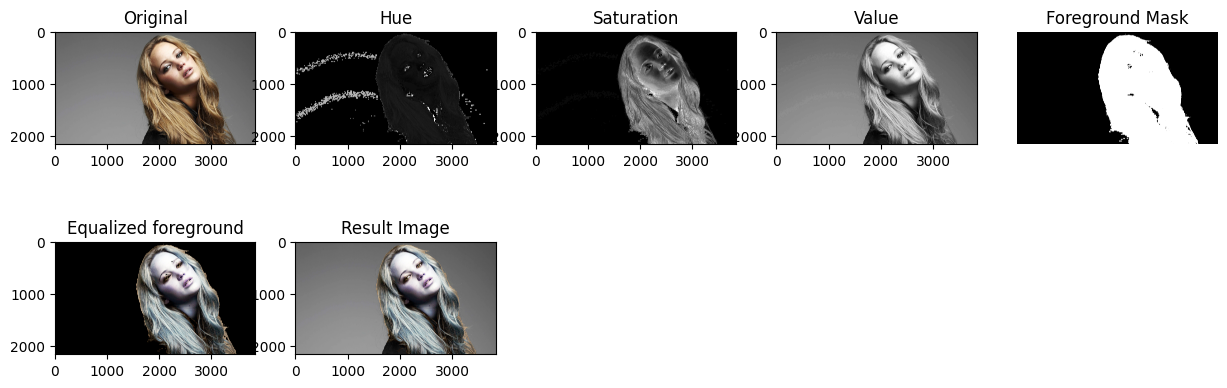

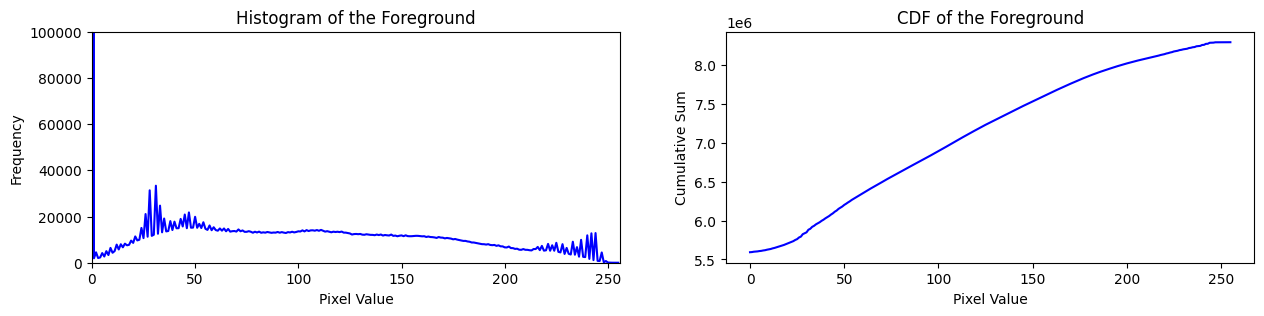

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, sat, val = cv.split(img_hsv)

# plot image, hue, sat, val
plt.figure(figsize=(15, 5))

plt.subplot(2, 5, 1)
plt.imshow(img_rgb)
plt.title('Original')

plt.subplot(2, 5, 2)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(2, 5, 3)
plt.imshow(sat, cmap='gray')
plt.title('Saturation')

plt.subplot(2, 5, 4)
plt.imshow(val, cmap='gray')
plt.title('Value')

# Thresholding the saturation plane to create a foreground mask
_, foreground_mask = cv.threshold(sat, 15, 255, cv.THRESH_BINARY)
# foreground_mask = cv.morphologyEx(foreground_mask, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(80,80) ))


plt.subplot(2, 5, 5)
plt.imshow(foreground_mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis('off')

# Apply bitwise AND operation to get the foreground only
foreground = cv.bitwise_and(img, img, mask=foreground_mask)

# Convert foreground to grayscale
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)

# Compute the histogram of the foreground
hist_foreground = cv.calcHist([foreground_gray], [0], None, [256], [0, 256])

# Histogram-equalize the foreground channels separately
equalized_r = cv.equalizeHist(foreground[:, :, 0])
equalized_g = cv.equalizeHist(foreground[:, :, 1])
equalized_b = cv.equalizeHist(foreground[:, :, 2])

equalized_foreground = cv.merge((equalized_r, equalized_g, equalized_b))
# equalized_foreground = cv.cvtColor(equalized_foreground, cv.COLOR_RGB2BGR)    


plt.subplot(2, 5, 6)
# plt.imshow(cv.cvtColor(equalized_foreground, cv.COLOR_HSV2BGR))
plt.imshow(equalized_foreground)
plt.title('Equalized foreground')

# Extract the background
background = cv.bitwise_and(img, img, mask=cv.bitwise_not(foreground_mask))
background_rgb = cv.cvtColor(background, cv.COLOR_BGR2RGB)

# Add the background and foreground
result_image = cv.add(background_rgb, equalized_foreground)
# result_image = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

# Display the result
plt.subplot(2, 5, 7)
plt.imshow(result_image)
# result_image = cv.cvtColor(result_image, cv.COLOR_BGR2RGB) 
plt.title('Result Image')

fig = plt.figure(figsize=(15, 3))
# Plot the histogram
plt.subplot(1, 2, 1)
plt.plot(hist_foreground, color='b')
plt.title('Histogram of the Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.ylim([0, 100000])

# Cumulatively sum the histogram from the left
cdf_foreground = np.cumsum(hist_foreground)

# Plot the CDF
plt.subplot(1,2,2)
plt.plot(cdf_foreground, color='b')
plt.title('CDF of the Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Sum')


plt.show()


Q7

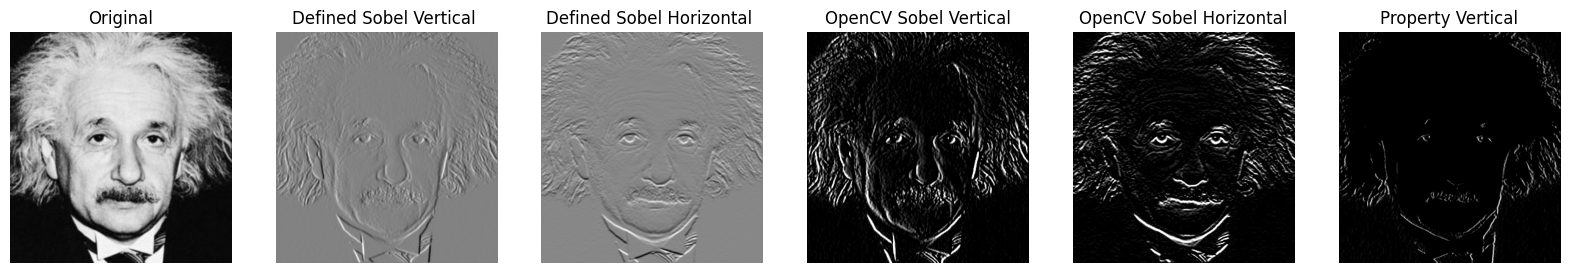

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

# write a function to fiter the given image with given kernel
def filterImg(image, kernel):
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    output = np.zeros(image.shape,'float')
    for y in range(pad_h,img_h-pad_h):
        for x in range(pad_w,img_w-pad_w):
            output[y, x] = np.dot(image_float[y - pad_h:y + pad_h + 1, x - pad_w:x + pad_w + 1].flatten(), kernel.flatten())
    return output

# Sobel horizontal
kernel_h = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
# Sobel vertical
kernel_v = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
# Using Propertry of Convolution
kernel_1 = np.array([(1), (2), (1)], dtype='float')
kernel_2 = np.array([(1, 0, -1)], dtype='float')
# Using OpenCV
imgcv = cv.filter2D(img,-1,kernel_v)
imgch = cv.filter2D(img,-1,kernel_h)
# Using Defined Function
imgv = filterImg(img, kernel_v)
imgh = filterImg(img, kernel_h)
# Using Property of Convolution
imgpv = cv.filter2D(img, -1, kernel_1)
imgpv = cv.filter2D(imgpv, -1, kernel_2)

# Plot the original and filtered images
fig, axes  = plt.subplots(1,6, sharex='all', sharey='all', figsize=(20,5))
images=[img,imgv,imgh,imgcv,imgch,imgpv]
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(['Original','Defined Sobel Vertical ','Defined Sobel Horizontal ','OpenCV Sobel Vertical','OpenCV Sobel Horizontal','Property Vertical'][i])
    plt.axis('off')

plt.show()

Q9

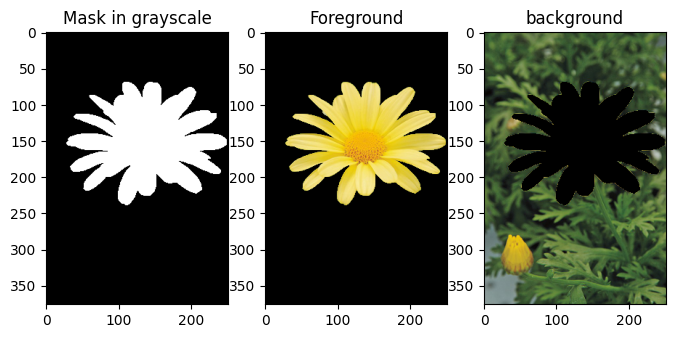

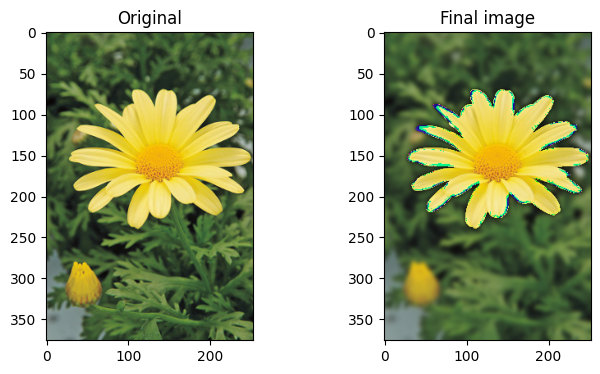

In [5]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt

img = cv.imread('flower.png',cv.IMREAD_COLOR)

rect = (20,50,250,200)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

mask = np.zeros(img.shape[:2],np.uint8)

cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# plot mask
plt.figure(figsize=(8,4))
plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title('Mask in grayscale')

foreground = img * mask2[:, :, np.newaxis]
background = img - foreground
blurred_background = cv.GaussianBlur(background, (15, 15),0)
final_image = blurred_background + foreground

plt.subplot(1, 3, 2)
foreground = cv.cvtColor(foreground, cv.COLOR_BGR2RGB)
plt.imshow(foreground)
plt.title('Foreground')

plt.subplot(1, 3, 3)
background = cv.cvtColor(background, cv.COLOR_BGR2RGB)
plt.imshow(background)
plt.title('background')

plt.show()

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original')


plt.subplot(1, 2, 2)
final_image = cv.cvtColor(final_image, cv.COLOR_BGR2RGB)
plt.imshow(final_image)
plt.title('Final image')
plt.show()